Imports

In [375]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model, preprocessing
import sklearn.model_selection
import matplotlib.pyplot as pyplot
from matplotlib import style
import seaborn as sb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import scipy.stats as stats
import pylab

Read Relavent Data from DataSet

In [376]:
data = pd.read_csv("student-mat.csv", sep=";")

data = data [["G1", "G2", "G3", "studytime", "failures", "absences", "higher", "internet", "Dalc", "activities"]]
#Where G1 = first period grade, G2 = second period grade, G3 = final grade 

Interperet Data

In [377]:
data.shape

(395, 10)

In [378]:
data.head()

,G1,G2,G3,studytime,failures,absences,higher,internet,Dalc,activities
0,5,6,6,2,0,6,yes,no,1,no
1,5,5,6,2,0,4,yes,yes,1,no
2,7,8,10,2,3,10,yes,yes,2,no
3,15,14,15,3,0,2,yes,yes,1,yes
4,6,10,10,2,0,4,yes,no,1,no


In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   G1          395 non-null    int64 
 1   G2          395 non-null    int64 
 2   G3          395 non-null    int64 
 3   studytime   395 non-null    int64 
 4   failures    395 non-null    int64 
 5   absences    395 non-null    int64 
 6   higher      395 non-null    object
 7   internet    395 non-null    object
 8   Dalc        395 non-null    int64 
 9   activities  395 non-null    object
dtypes: int64(7), object(3)
memory usage: 31.0+ KB


In [380]:
data.describe()

,G1,G2,G3,studytime,failures,absences,Dalc
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190,2.035443,0.334177,5.708861,1.481013
std,3.319195,3.761505,4.581443,0.839240,0.743651,8.003096,0.890741
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,8.000000,9.000000,8.000000,1.000000,0.000000,0.000000,1.000000
50%,11.000000,11.000000,11.000000,2.000000,0.000000,4.000000,1.000000
75%,13.000000,13.000000,14.000000,2.000000,0.000000,8.000000,2.000000
max,19.000000,19.000000,20.000000,4.000000,3.000000,75.000000,5.000000


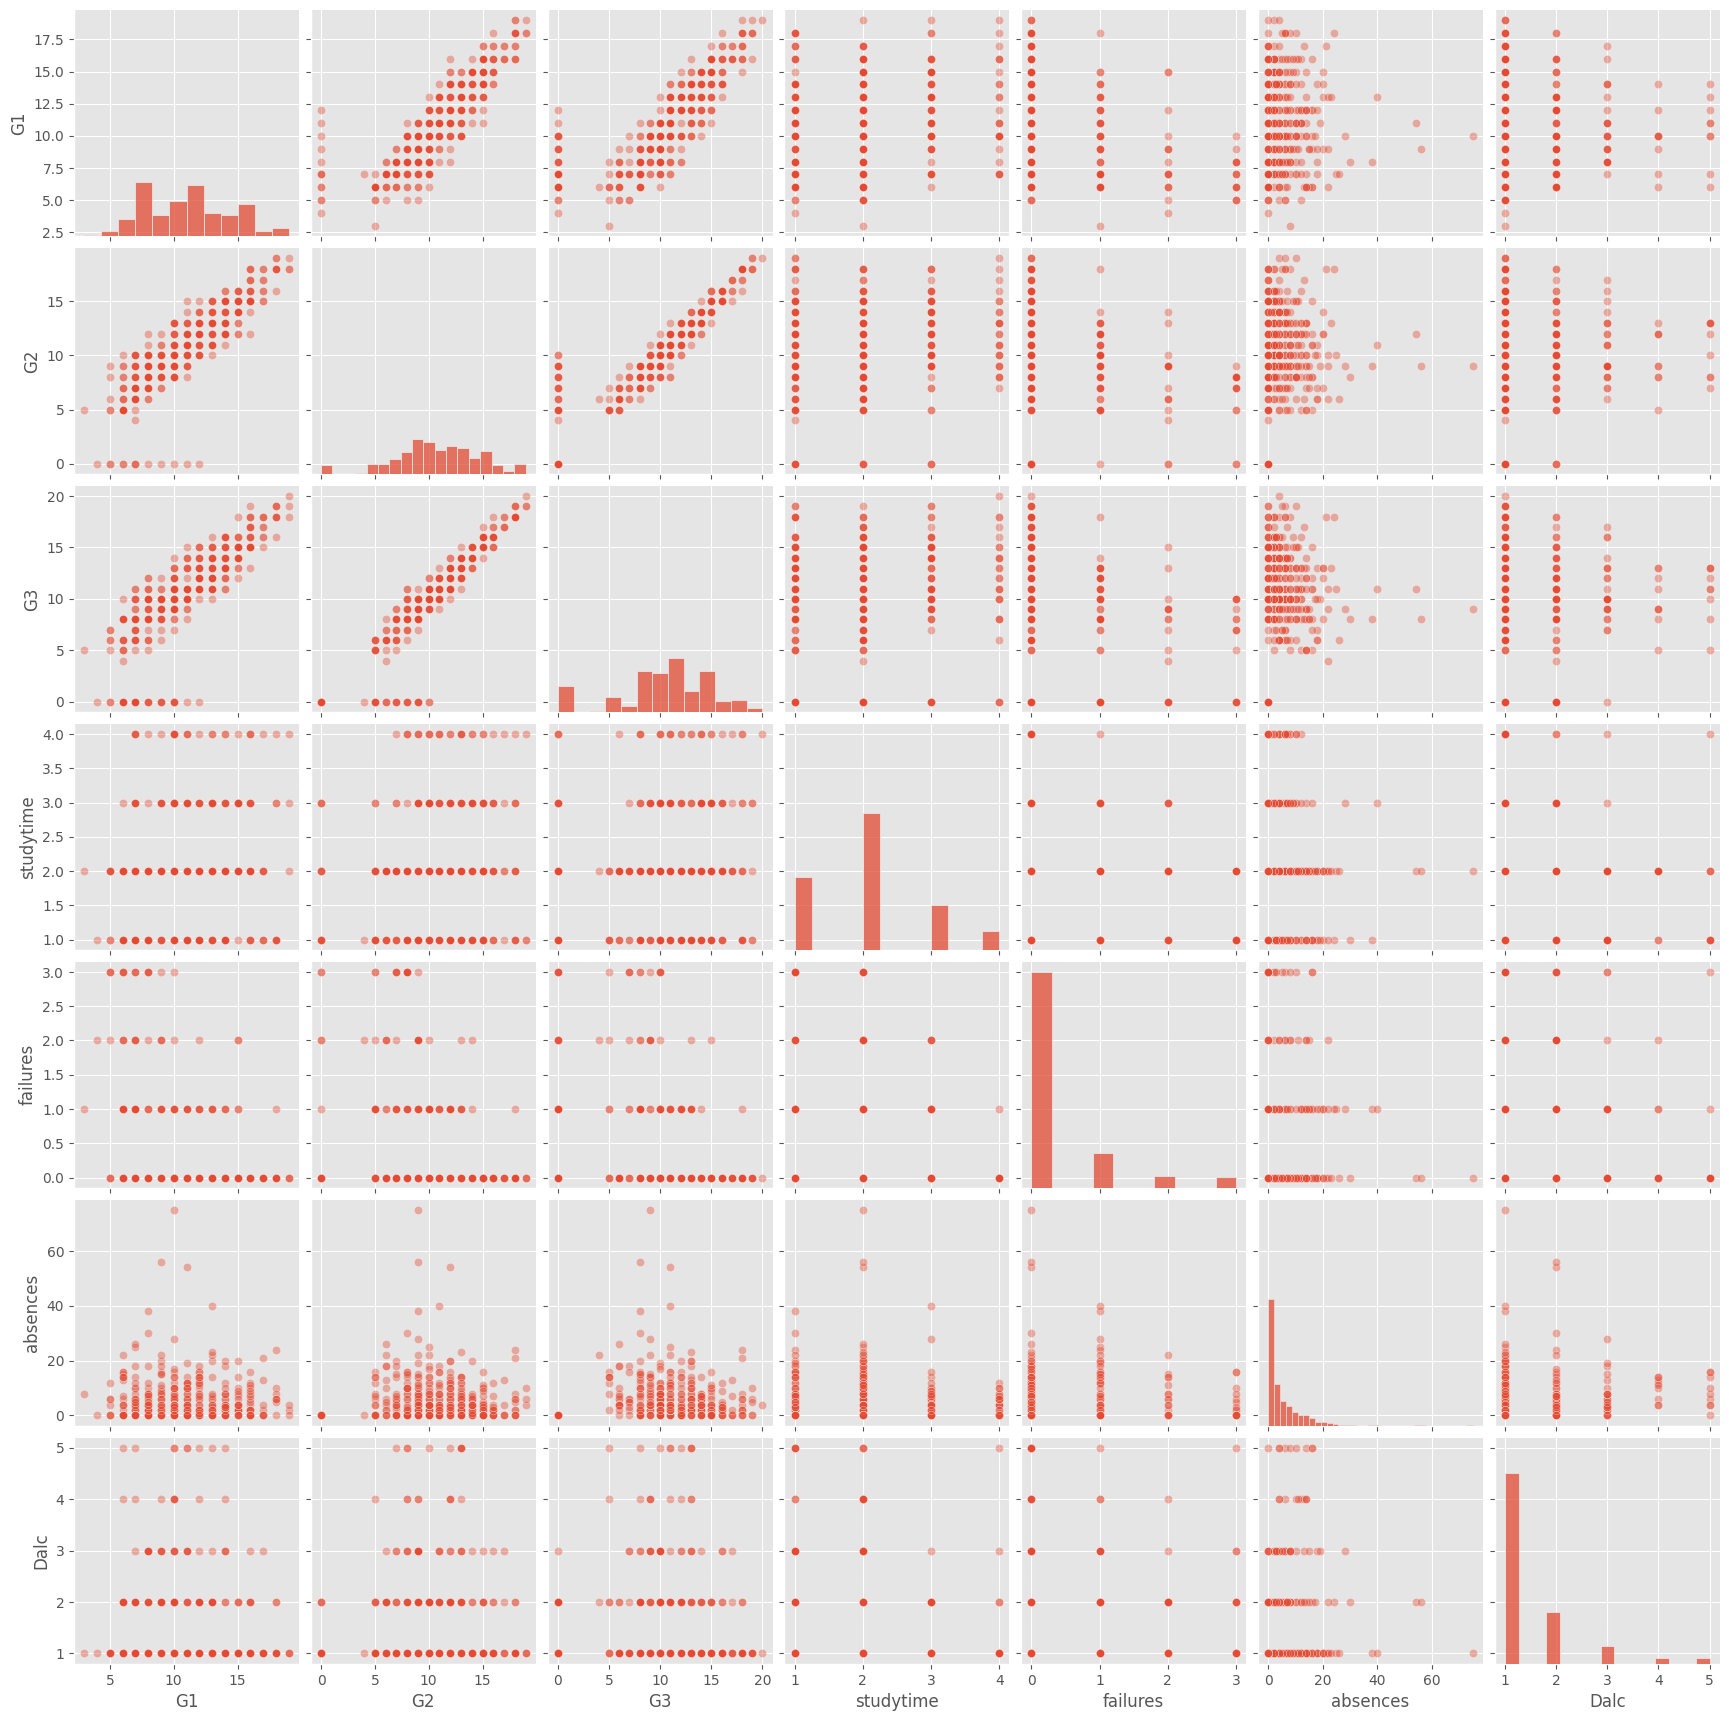

In [381]:
sb.pairplot(data, kind='scatter', plot_kws={'alpha': 0.4})

Convert non-numerical values into numbers

In [382]:
le = preprocessing.LabelEncoder()
data["higher"] = le.fit_transform(list(data["higher"]))
data["internet"] = le.fit_transform(list(data["internet"]))
data["Dalc"] = le.fit_transform(list(data["Dalc"]))
data["activities"] = le.fit_transform(list(data["activities"]))


Training the Linear Regression Model Using Scikit-Learn in Python

In [383]:
predict = "G3"

X = np.array(data.drop([predict], axis=1))
Y = np.array(data[predict])

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)

linear = linear_model.LinearRegression()

linear.fit(X_train, Y_train)

LinearRegression()

Print the Accuracy, Coefficients, and Intercept

In [384]:
accuracy = linear.score(X_test, Y_test)
print("Model Accuracy: ", accuracy*100, '%')

print('Coefficients: \n', linear.coef_)
print('intercept: \n', linear.intercept_)

Model Accuracy:  92.07152054402606 %
Coefficients: 
 [ 0.17863199  0.96317629 -0.20688744 -0.30493952  0.04049478  0.30274705
 -0.14576065  0.02592662 -0.30386329]
intercept: 
 -1.6397508797121212


Prediction Values

In [385]:
predictions = linear.predict(X_test)

for X in range(len(predictions)):
   print("Prediction: ", predictions[X], "\nX: ", X_test[X], "\nY: ", Y_test[X])

Prediction:  11.98615779830758 
X:  [12 12  2  1 12  1  1  0  0] 
Y:  13
Prediction:  5.828336530064282 
X:  [7 7 3 0 6 1 1 0 1] 
Y:  7
Prediction:  8.169957169405862 
X:  [ 7 10  3  1  0  1  1  0  1] 
Y:  10
Prediction:  7.1822886272264945 
X:  [ 9  7  2  0 18  1  1  0  0] 
Y:  6
Prediction:  13.642362455291735 
X:  [13 14  3  0  6  1  1  0  1] 
Y:  14
Prediction:  16.79656312068259 
X:  [17 17  4  0  0  1  1  0  1] 
Y:  18
Prediction:  11.87801371626302 
X:  [15 12  2  1  0  1  0  0  1] 
Y:  12
Prediction:  11.88681606067262 
X:  [13 12  1  0  0  1  1  0  1] 
Y:  12
Prediction:  10.127455691667453 
X:  [ 8 11  2  0  0  1  1  0  0] 
Y:  11
Prediction:  12.093036928180393 
X:  [12 12  1  0  2  1  1  0  0] 
Y:  11
Prediction:  7.95501602656771 
X:  [10  8  1  0 10  1  1  2  1] 
Y:  9
Prediction:  5.5378901023454885 
X:  [ 7  6  2  0 10  1  1  0  0] 
Y:  6
Prediction:  12.074055241238334 
X:  [12 12  2  0  6  1  1  1  0] 
Y:  12
Prediction:  17.400572587229483 
X:  [16 17  1  0  4  1  1 

Graphical Evaluation of Predictions

Text(0.5, 1.0, 'Evaluation of Linear Model')

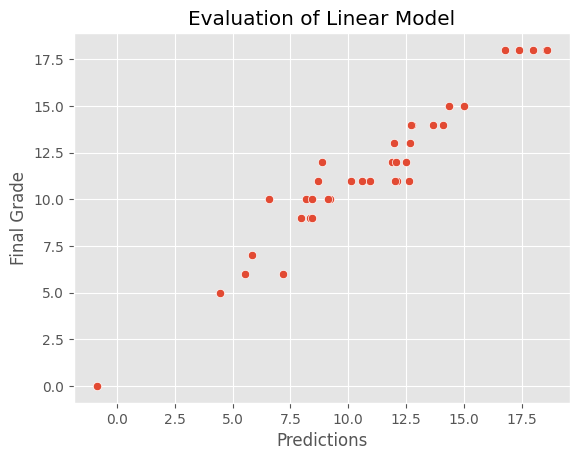

In [386]:
sb.scatterplot(x=predictions, y=Y_test)
pyplot.xlabel("Predictions")
pyplot.ylabel("Final Grade")
pyplot.title("Evaluation of Linear Model")

Analytical Evaluation of the errors

In [387]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predictions))
print("Mean Square Error: ", mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(Y_test, predictions)))

Mean Absolute Error:  0.8806603240888069
Mean Square Error:  1.355720433974943
Root Mean Squared Error:  1.1643540844498046


Residual Analysis

In [388]:
residuals = Y_test - predictions

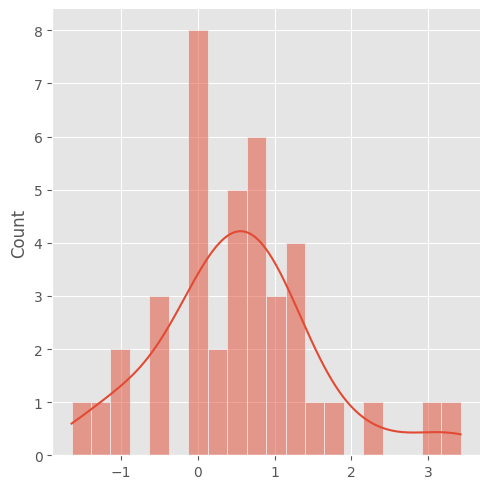

In [389]:
sb.displot(residuals, bins=20, kde=True)

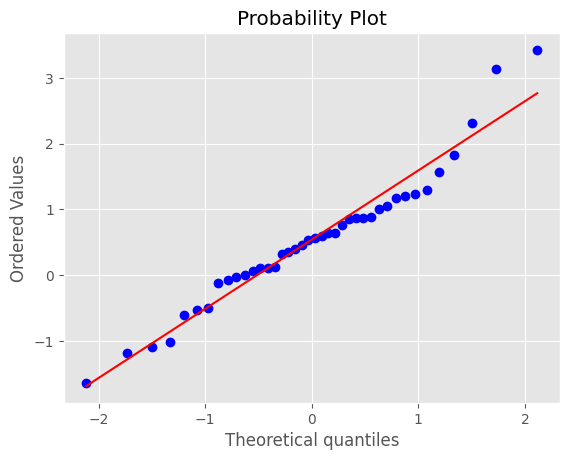

In [391]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show